
# 📘 Regresión Lineal Simple — Ejemplos para Colab

Este cuaderno incluye **dos casos** de regresión lineal simple con datos ficticios:

1) **Superficie (m²) → Precio de arriendo (USD)**  
2) **Horas de estudio → Nota de examen**

Cada caso contiene: creación del dataset, ajuste del modelo con `numpy`, gráfico, y una celda **Markdown + LaTeX** con la interpretación de los resultados.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


---

## Ejemplo 1 — Superficie (m²) → Precio de arriendo (USD)


In [2]:
# Dataset ficticio
df = pd.DataFrame({
    "superficie_m2": [30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
    "precio_usd":    [250, 320, 400, 460, 520, 580, 640, 700, 750, 800]
})

In [3]:
df.shape

(10, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   superficie_m2  10 non-null     int64
 1   precio_usd     10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [7]:
df.isnull().sum()

,0
superficie_m2,0
precio_usd,0


In [6]:
df.head(10)

,superficie_m2,precio_usd
0,30,250
1,40,320
2,50,400
3,60,460
4,70,520
5,80,580
6,90,640
7,100,700
8,110,750
9,120,800


In [8]:
# Guardar CSV (en Colab quedará en /content/)
csv_path = Path("arriendo_superficie_regresion_simple.csv")
df.to_csv(csv_path, index=False)

In [9]:
# Ajuste de regresión lineal (y = b0 + b1*x)
x = df["superficie_m2"].to_numpy(dtype=float)
y = df["precio_usd"].to_numpy(dtype=float)

b1, b0 = np.polyfit(x, y, 1)
y_hat = b0 + b1 * x

In [11]:
# Residuos y métricas
resid = y - y_hat
SSE = (resid**2).sum()
SST = ((y - y.mean())**2).sum()
R2  = 1 - SSE/SST

print(f"CSV guardado en: {csv_path.resolve()}")
print(f"b1 (pendiente) = {b1:.4f}")
print(f"b0 (intercepto) = {b0:.4f}")
print(f"SSE = {SSE:.4f} | SST = {SST:.4f} | R^2 = {R2:.4f}")



CSV guardado en: /content/arriendo_superficie_regresion_simple.csv
b1 (pendiente) = 6.0970
b0 (intercepto) = 84.7273
SSE = 1082.4242 | SST = 307760.0000 | R^2 = 0.9965


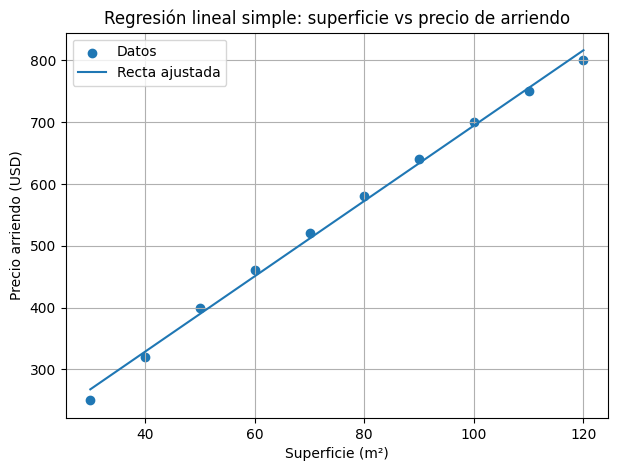

In [12]:
# Gráfico
plt.figure(figsize=(7,5))
plt.scatter(x, y, label="Datos")
plt.plot(x, y_hat, label="Recta ajustada")
plt.xlabel("Superficie (m²)")
plt.ylabel("Precio arriendo (USD)")
plt.title("Regresión lineal simple: superficie vs precio de arriendo")
plt.legend()
plt.grid(True)
plt.show()


### Interpretación
**Ecuación ajustada:**
$$
\hat{y} = b_0 + b_1 x
$$

Con los datos anteriores (al ejecutarlo en tu entorno deberían ser similares):
- **Pendiente** \(b_1\): incremento esperado del precio por **cada m² adicional**.
- **Intercepto** \(b_0\): precio estimado cuando \(x=0\) m² (útil para la ecuación, puede no tener sentido práctico).
- **\(R^2\)**: proporción de la variación del precio explicada por la superficie.


**Métricas usadas:**

$$
\text{SSE} = \sum (y_i - \hat{y}_i)^2
$$

$$
\text{SST} = \sum (y_i - \bar{y})^2
$$

$$
R^2 = 1 - \frac{\text{SSE}}{\text{SST}}
$$




---

## Ejemplo 2 — Horas de estudio → Nota de examen


In [13]:
# Dataset ficticio
df2 = pd.DataFrame({
    "horas_estudio": [1,2,3,4,5,6,7,8,9,10],
    "nota_examen":   [2.0,3.0,3.7,4.5,5.0,5.5,6.0,6.4,6.6,6.9]
})

In [14]:
df2.head()

,horas_estudio,nota_examen
0,1,2.0
1,2,3.0
2,3,3.7
3,4,4.5
4,5,5.0


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   horas_estudio  10 non-null     int64  
 1   nota_examen    10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


In [16]:
df2.isnull().sum()

,0
horas_estudio,0
nota_examen,0


In [17]:
# Guardar CSV
csv_path2 = Path("estudio_notas_regresion_simple.csv")
df2.to_csv(csv_path2, index=False)

In [19]:
# Ajuste de regresión
x2 = df2["horas_estudio"].to_numpy(dtype=float)
y2 = df2["nota_examen"].to_numpy(dtype=float)

b1_2, b0_2 = np.polyfit(x2, y2, 1)
y_hat2 = b0_2 + b1_2 * x2

In [20]:
# Residuos y métricas
resid2 = y2 - y_hat2
SSE2 = (resid2**2).sum()
SST2 = ((y2 - y2.mean())**2).sum()
R2_2 = 1 - SSE2/SST2

print(f"CSV guardado en: {csv_path2.resolve()}")
print(f"b1 (pendiente) = {b1_2:.4f}")
print(f"b0 (intercepto) = {b0_2:.4f}")
print(f"SSE = {SSE2:.4f} | SST = {SST2:.4f} | R^2 = {R2_2:.4f}")



CSV guardado en: /content/estudio_notas_regresion_simple.csv
b1 (pendiente) = 0.5321
b0 (intercepto) = 2.0333
SSE = 0.9439 | SST = 24.3040 | R^2 = 0.9612


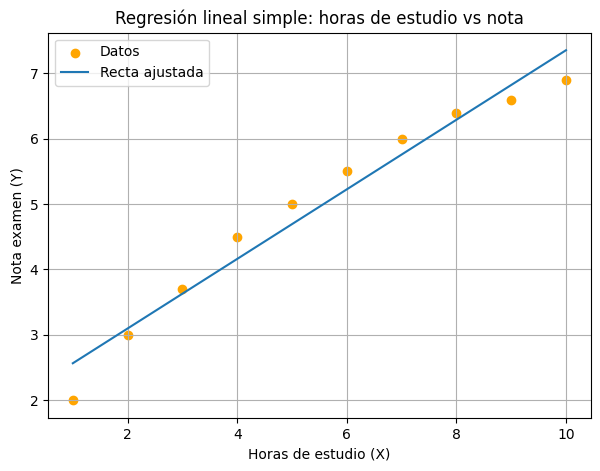

In [28]:
# Gráfico
plt.figure(figsize=(7,5))
plt.scatter(x2, y2, color="orange",  label="Datos")
plt.plot(x2, y_hat2, label="Recta ajustada")
plt.xlabel("Horas de estudio (X)")
plt.ylabel("Nota examen (Y)")
plt.title("Regresión lineal simple: horas de estudio vs nota")
plt.legend()
plt.grid(True)
plt.show()



### Interpretación

**Ecuación ajustada:**
$$
\hat{y} = b_0 + b_1 x
$$

- **Pendiente** \(b_1\): incremento esperado de la **nota** por **cada hora adicional** de estudio.  
- **Intercepto** \(b_0\): nota estimada cuando \(x=0\).  
- **\(R^2\)**: proporción de la variación de la nota explicada por las horas de estudio.

**Métricas usadas:**
$$
\text{SSE} = \sum (y_i - \hat{y}_i)^2
$$

$$
\text{SST} = \sum (y_i - \bar{y})^2
$$

$$
R^2 = 1 - \frac{\text{SSE}}{\text{SST}}
$$


# **Librería Scikit-Learn**

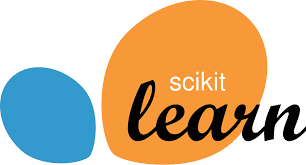

Scikit-Learn (también conocida como sklearn) es una de las librerías de aprendizaje automático más populares y potentes en Python. Fue creada para ser accesible y fácil de usar, incluso para principiantes, pero a la vez es lo suficientemente robusta para ser utilizada en proyectos de investigación y producción a gran escala. Su objetivo principal es ofrecer una serie de algoritmos de machine learning listos para usar en un entorno consistente.



# **¿Qué la hace tan popular?**
1. Fácil de usar: Su diseño se basa en una interfaz uniforme y consistente. Una vez que aprendes a usar un algoritmo, es muy sencillo aplicar otros. Esto se debe a su estructura de Estimadores, Transformers y Predictors, que comparten métodos como .fit() para entrenar el modelo y .predict() para hacer predicciones.

2. Extensa documentación: Cuenta con una documentación muy completa, clara y con muchos ejemplos, lo que facilita mucho el aprendizaje.

3. Rendimiento: Está construida sobre otras librerías de alto rendimiento como NumPy, SciPy y Matplotlib, lo que le permite manejar eficientemente grandes volúmenes de datos.

4. Amplia gama de algoritmos: Incluye una enorme variedad de algoritmos para las tareas más comunes de aprendizaje automático, como:

* Clasificación: Para predecir una categoría (por ejemplo, si un correo es spam o no).

* Regresión: Para predecir un valor numérico (por ejemplo, el precio de una casa).

* Clustering: Para agrupar datos sin etiquetas (por ejemplo, segmentar clientes).

* Reducción de dimensionalidad: Para simplificar los datos y visualizarlos mejor (por ejemplo, PCA).

* Selección de modelos: Herramientas para evaluar y ajustar el rendimiento de los modelos.

# **¿Cómo se usa?**
Un flujo de trabajo típico con Scikit-Learn se ve así:

1. Cargar los datos: Se suelen usar librerías como Pandas para cargar y manipular los datos en un formato adecuado (como un DataFrame).

2. Dividir los datos: Se separan los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se usa para que el modelo "aprenda", y el de prueba para evaluar su rendimiento con datos que no ha visto.

3. Crear el modelo: Se instancia el algoritmo que quieres usar. Por ejemplo, from sklearn.ensemble import RandomForestClassifier y luego model = RandomForestClassifier().

4. Entrenar el modelo: Se usa el método .fit() para entrenar el modelo con los datos de entrenamiento. model.fit(X_train, y_train).

5. Hacer predicciones: Se usa el método .predict() para hacer predicciones sobre el conjunto de prueba. predictions = model.predict(X_test).

6. Evaluar el modelo: Se utilizan las métricas de Scikit-Learn para ver qué tan bien se desempeñó el modelo, como la accuracy o la f1_score.

# **¿A nivel de código como se muestra?**

1. Preparar los datos
Lo primero es tener tus datos listos. Generalmente, esto significa cargarlos en un DataFrame de Pandas. Necesitas separar tus datos en dos partes:

* Características (X): Las variables independientes que usarás para hacer la predicción (por ejemplo, el tamaño de una casa, el número de habitaciones).

* Objetivo (y): La variable dependiente que quieres predecir (por ejemplo, el precio de la casa).

Es importante que tanto X como y estén en un formato numérico que Scikit-Learn pueda procesar, como un array de NumPy.

2. Dividir los datos
Para evaluar qué tan bien funciona tu modelo, debes dividir tus datos en dos conjuntos:

* Conjunto de entrenamiento: El modelo aprenderá de estos datos.

* Conjunto de prueba: Estos datos son nuevos para el modelo y se usan para evaluar su rendimiento.

Esto se hace con la función train_test_split de Scikit-Learn.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Aquí, test_size=0.2 significa que el 20% de los datos se usarán para la prueba.

3. Crear y entrenar el modelo
Ahora, importas el modelo de regresión lineal (LinearRegression) y lo creas. Luego, lo entrenas usando los datos de entrenamiento con el método .fit().

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

El método .fit() es donde el algoritmo ajusta sus parámetros (la pendiente y la intersección) para encontrar la "mejor línea" que se ajusta a los datos.

4. Hacer predicciones
Una vez entrenado, puedes usar el modelo para predecir los valores del conjunto de prueba. Esto se hace con el método .predict().

In [ ]:
predictions = model.predict(X_test)

predictions ahora contendrá los valores predichos por tu modelo para cada una de las entradas en X_test.

5. Evaluar el modelo
El último paso es evaluar qué tan precisas fueron tus predicciones. Puedes usar métricas como el error cuadrático medio (Mean Squared Error) o el R
2
  para esto.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R-cuadrado (R^2): {r2}")

El MSE te da una idea del error promedio de tus predicciones, mientras que el R
2
  te dice qué porcentaje de la variabilidad en el objetivo es explicado por tu modelo.